In [1]:
# Basic EDA imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)


%matplotlib inline



In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking Counts
df['Class'].value_counts()
# 0 = Not Fraudulent
# 1 = Fraudulent Transaction

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df['Class'].value_counts(normalize=True)
# 0 = Not Fraudulent
# 1 = Fraudulent Transaction

0    0.998273
1    0.001727
Name: Class, dtype: float64

- 99.83% of Transactions were ok
- 0.17% of Transactions were fraudulent

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

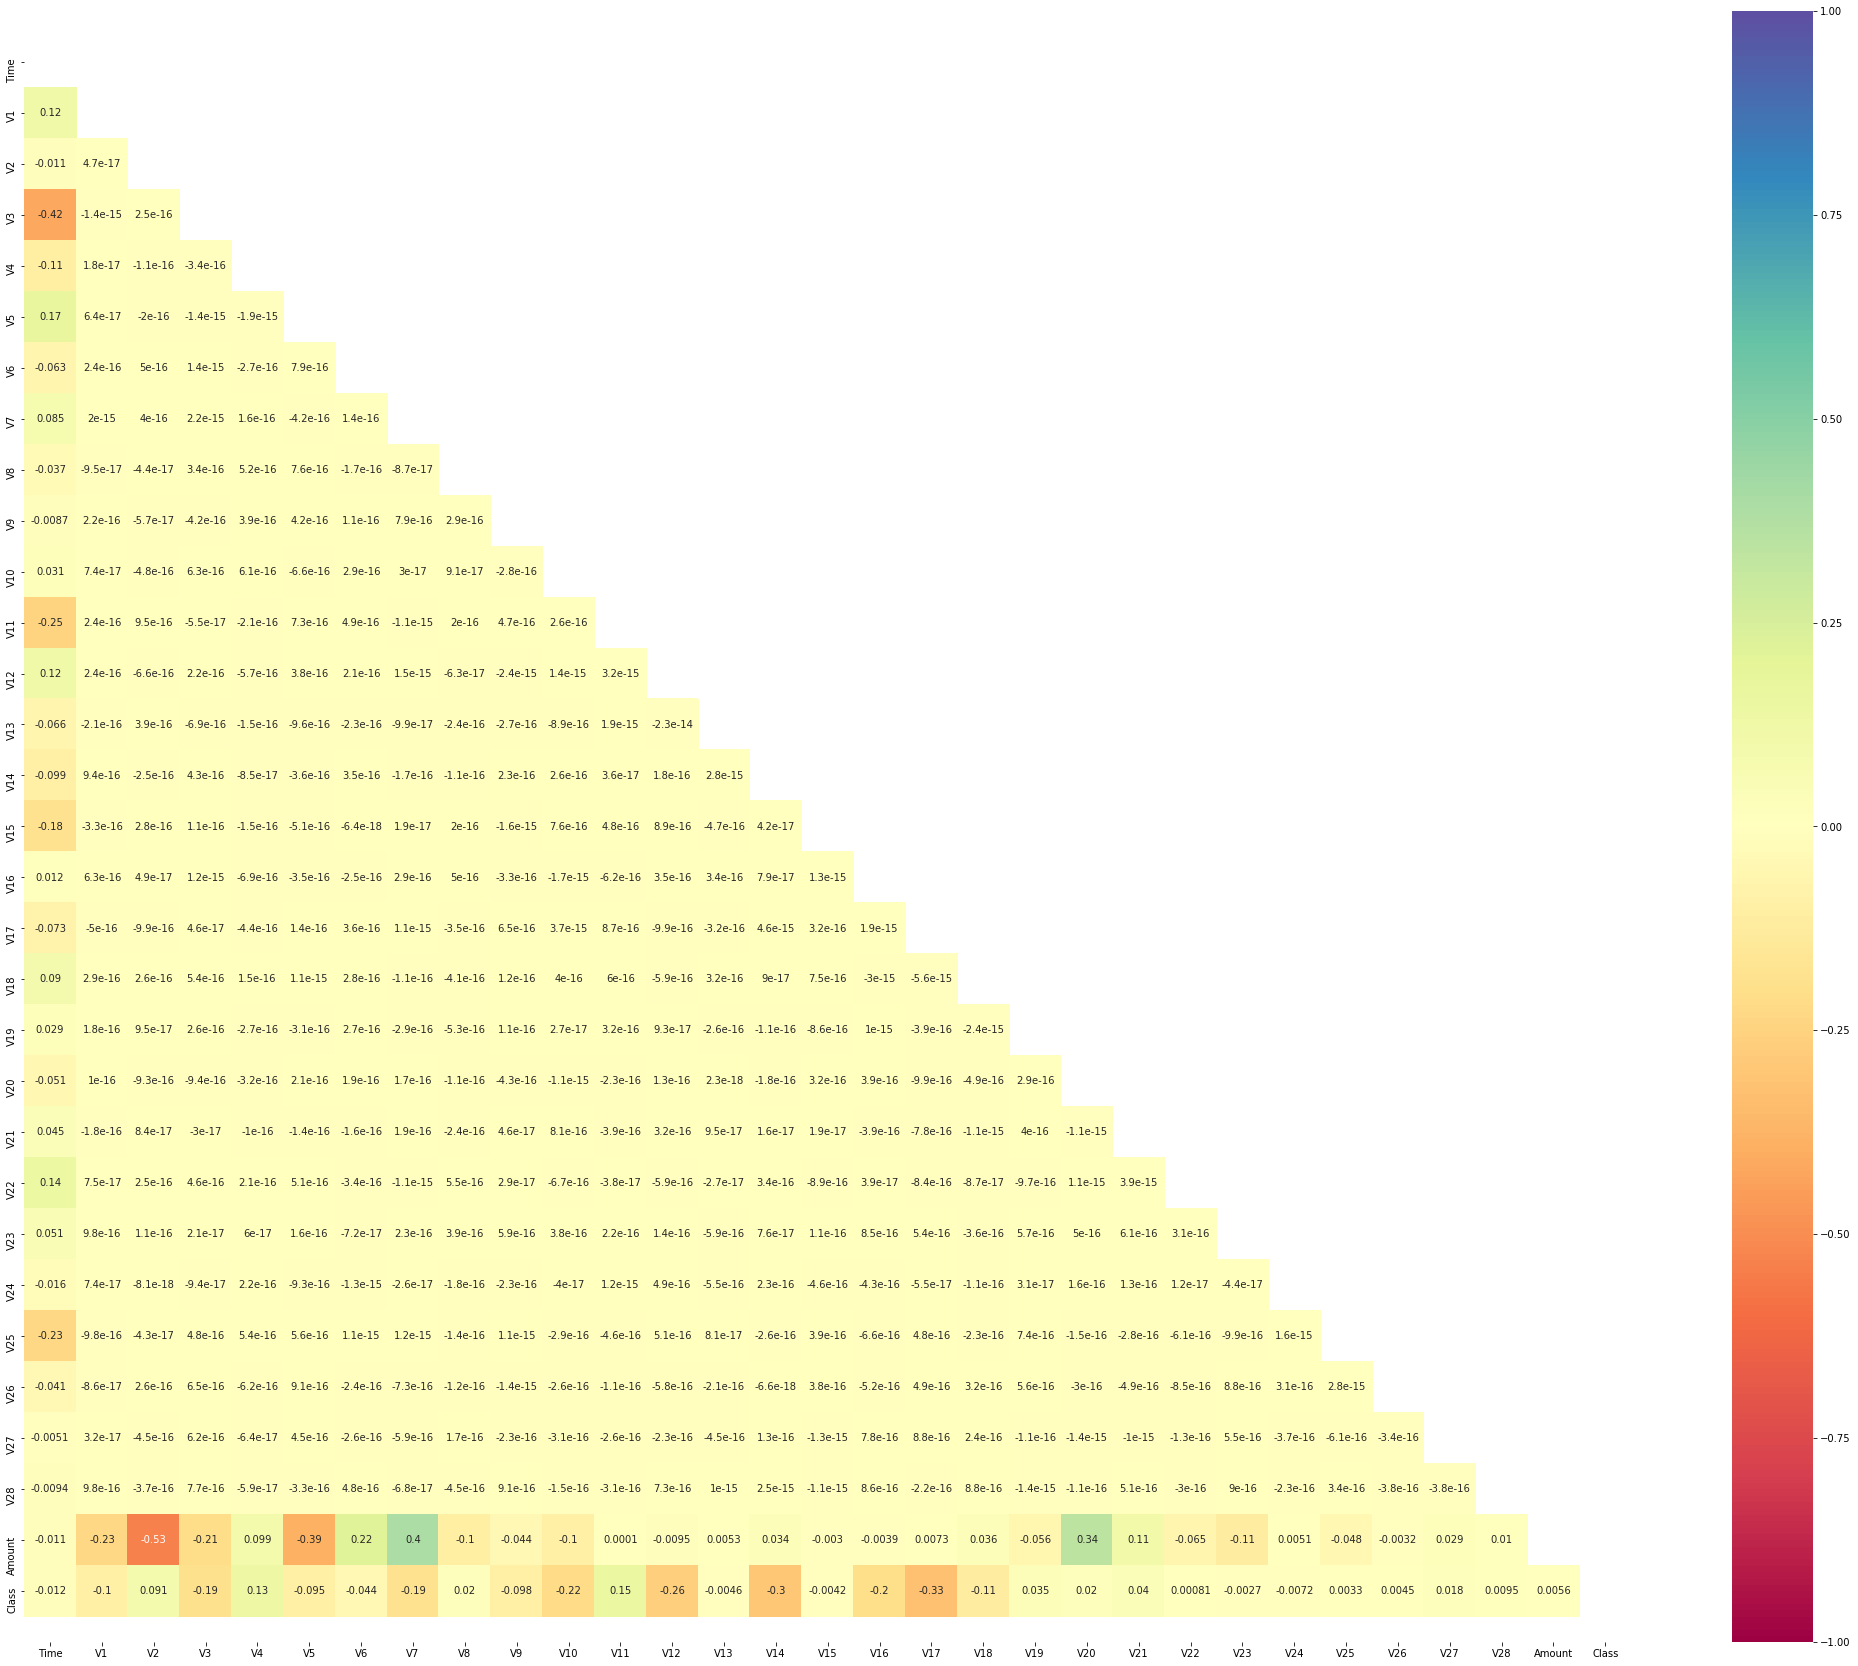

In [9]:
# Raw Data Correlation

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(36,30))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, mask=mask, cmap='Spectral')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('images/heatmapall.png')

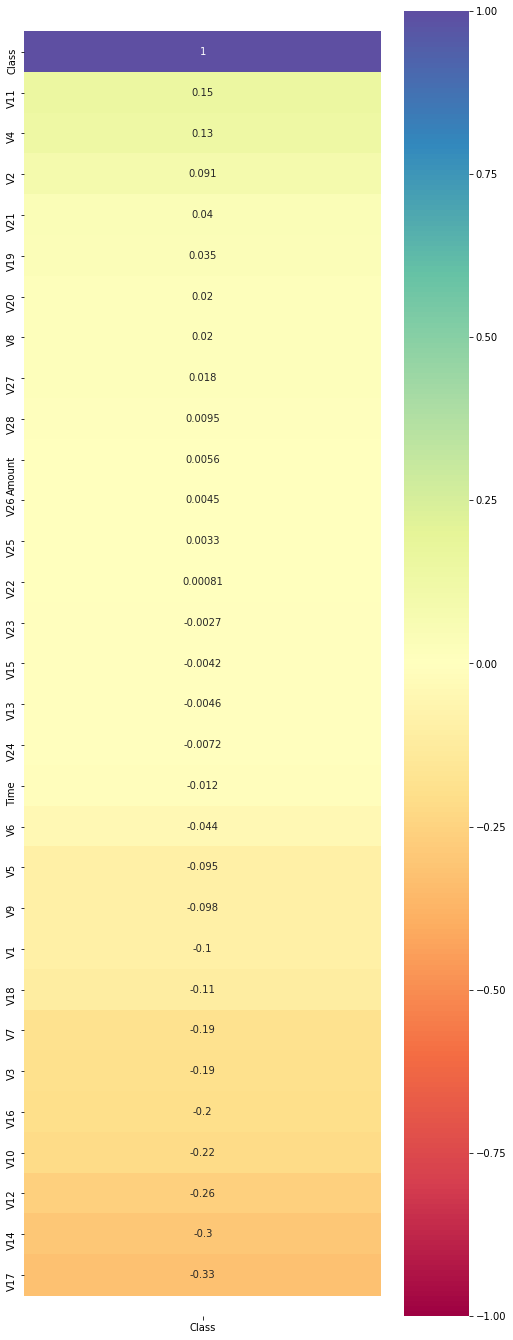

In [10]:
# Correlation against 'Class'
plt.figure(figsize=(8,24))
sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), annot=True, vmin=-1, vmax=1, cmap='Spectral')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#Vmin and Vmax are making it so it diverges on 0, not how it was

plt.savefig('images/heatmapclass.png')

In [11]:
len(df[df['Class'] == 0]), len(df[df['Class'] == 1])

(284315, 492)

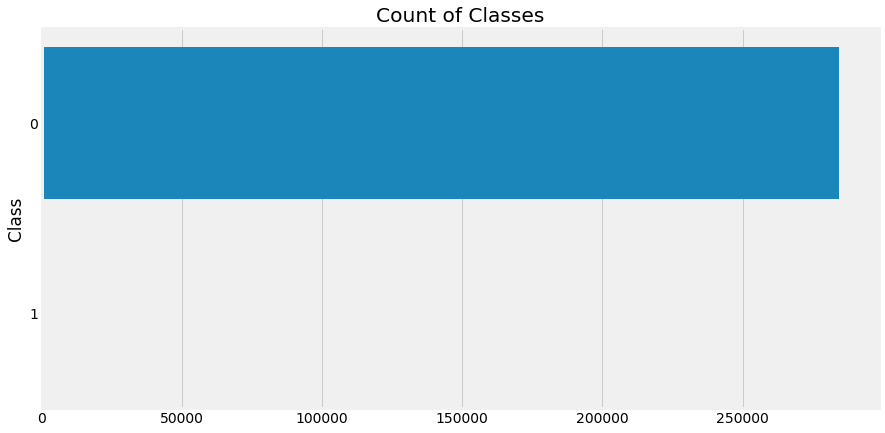

In [12]:
plt.figure(figsize=(15,7))

plt.style.use('fivethirtyeight')
# df2['Class'].value_counts().plot(kind='barh')
sns.countplot(y='Class', data=df);
plt.title('Count of Classes');
plt.xlabel('');

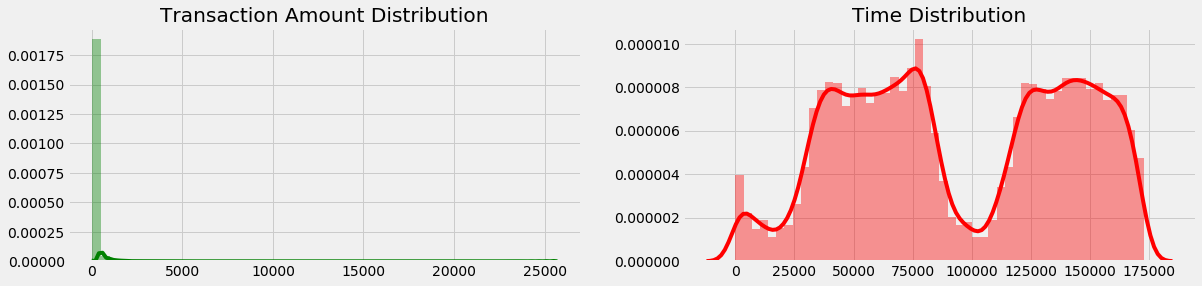

In [13]:
figure, axes = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['Amount'].values, ax=axes[0], color='g')
axes[0].set_title('Transaction Amount Distribution')

sns.distplot(df['Time'].values, ax=axes[1], color='r')
axes[1].set_title('Time Distribution')

plt.show()

# Create Oversampling Dataset

In [14]:
amt = len(df[df['Class'] == 0]) - len(df[df['Class'] == 1])
amt

283823

In [15]:
df_sample = df[df['Class'] == 1].sample(amt, replace=True, random_state=42)

In [16]:
df2 = pd.concat([df, df_sample])
df2.shape

(568630, 31)

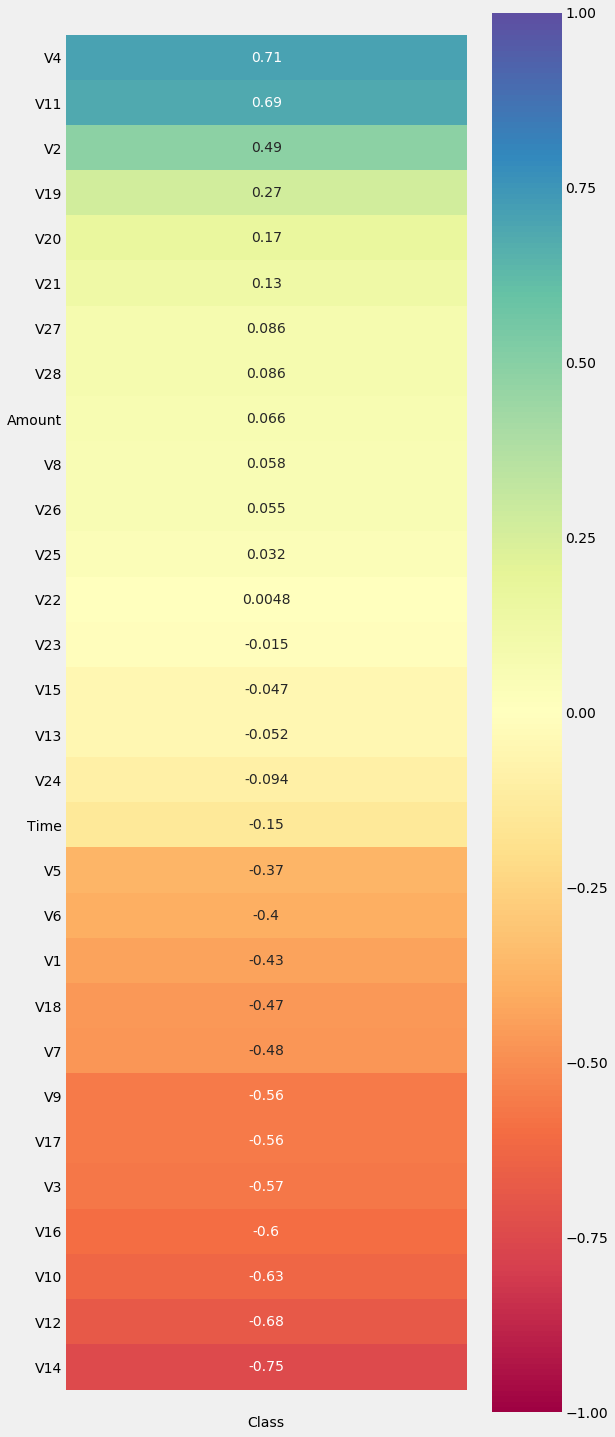

In [17]:
# Correlation against 'Class'
plt.figure(figsize=(8,24))
sns.heatmap(df2.corr()[['Class']].drop(index=['Class']).sort_values(by='Class', ascending=False), annot=True, vmin=-1, vmax=1, cmap='Spectral')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#Vmin and Vmax are making it so it diverges on 0, not how it was

plt.savefig('images/heatmapclass2.png')

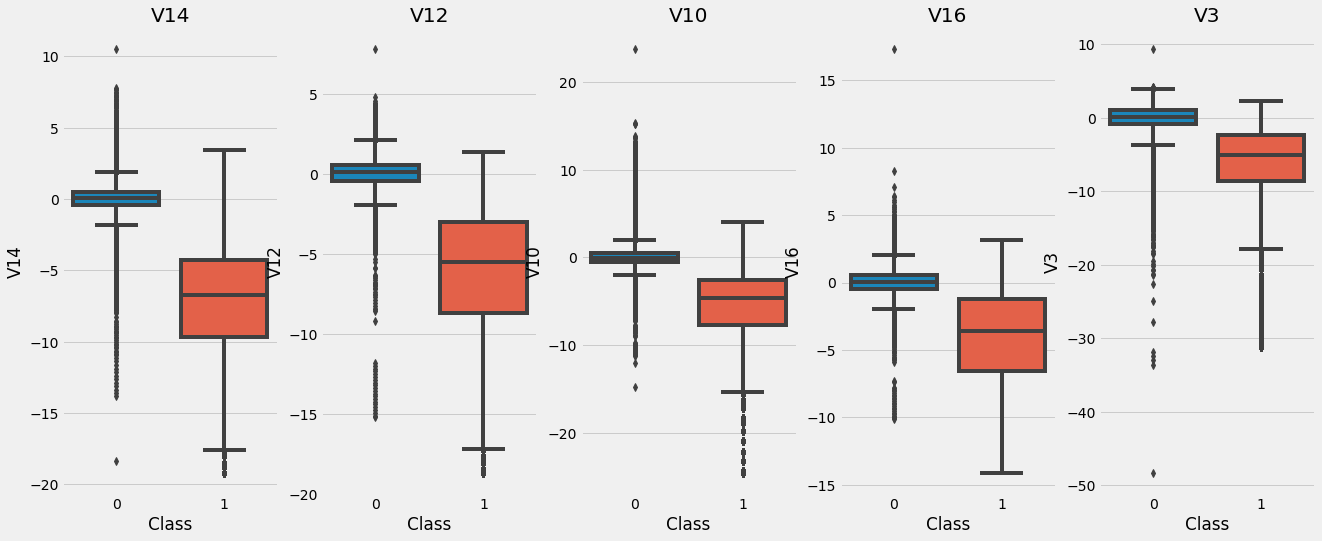

In [18]:
# 5 Negative Correlation Variables
fig, axes = plt.subplots(ncols=5, figsize=(20,8))

sns.boxplot(x="Class", y="V14", data=df2, ax=axes[0])
axes[0].set_title('V14')

sns.boxplot(x="Class", y="V12", data=df2, ax=axes[1])
axes[1].set_title('V12')

sns.boxplot(x="Class", y="V10", data=df2, ax=axes[2])
axes[2].set_title('V10')

sns.boxplot(x="Class", y="V16", data=df2, ax=axes[3])
axes[3].set_title('V16')

sns.boxplot(x="Class", y="V3", data=df2, ax=axes[4])
axes[4].set_title('V3')

plt.show()

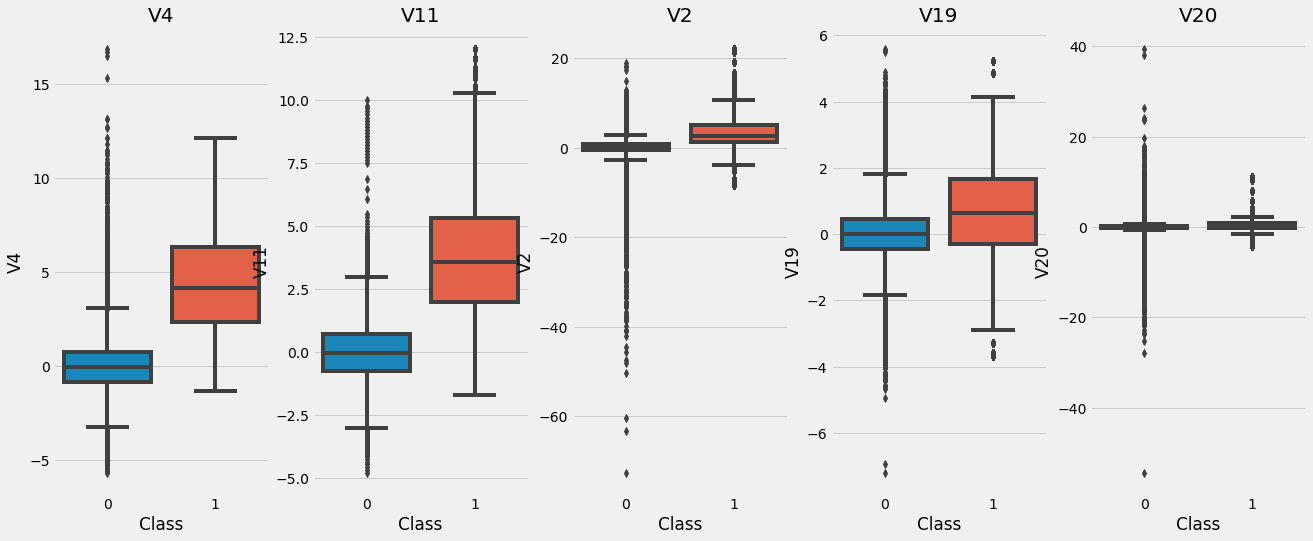

In [19]:
# 5 Most Positive Correlation Variables
fig, axes = plt.subplots(ncols=5, figsize=(20,8))

sns.boxplot(x="Class", y="V4", data=df2, ax=axes[0])
axes[0].set_title('V4')

sns.boxplot(x="Class", y="V11", data=df2, ax=axes[1])
axes[1].set_title('V11')

sns.boxplot(x="Class", y="V2", data=df2, ax=axes[2])
axes[2].set_title('V2')

sns.boxplot(x="Class", y="V19", data=df2, ax=axes[3])
axes[3].set_title('V19')

sns.boxplot(x="Class", y="V20", data=df2, ax=axes[4])
axes[4].set_title('V20')

plt.show()

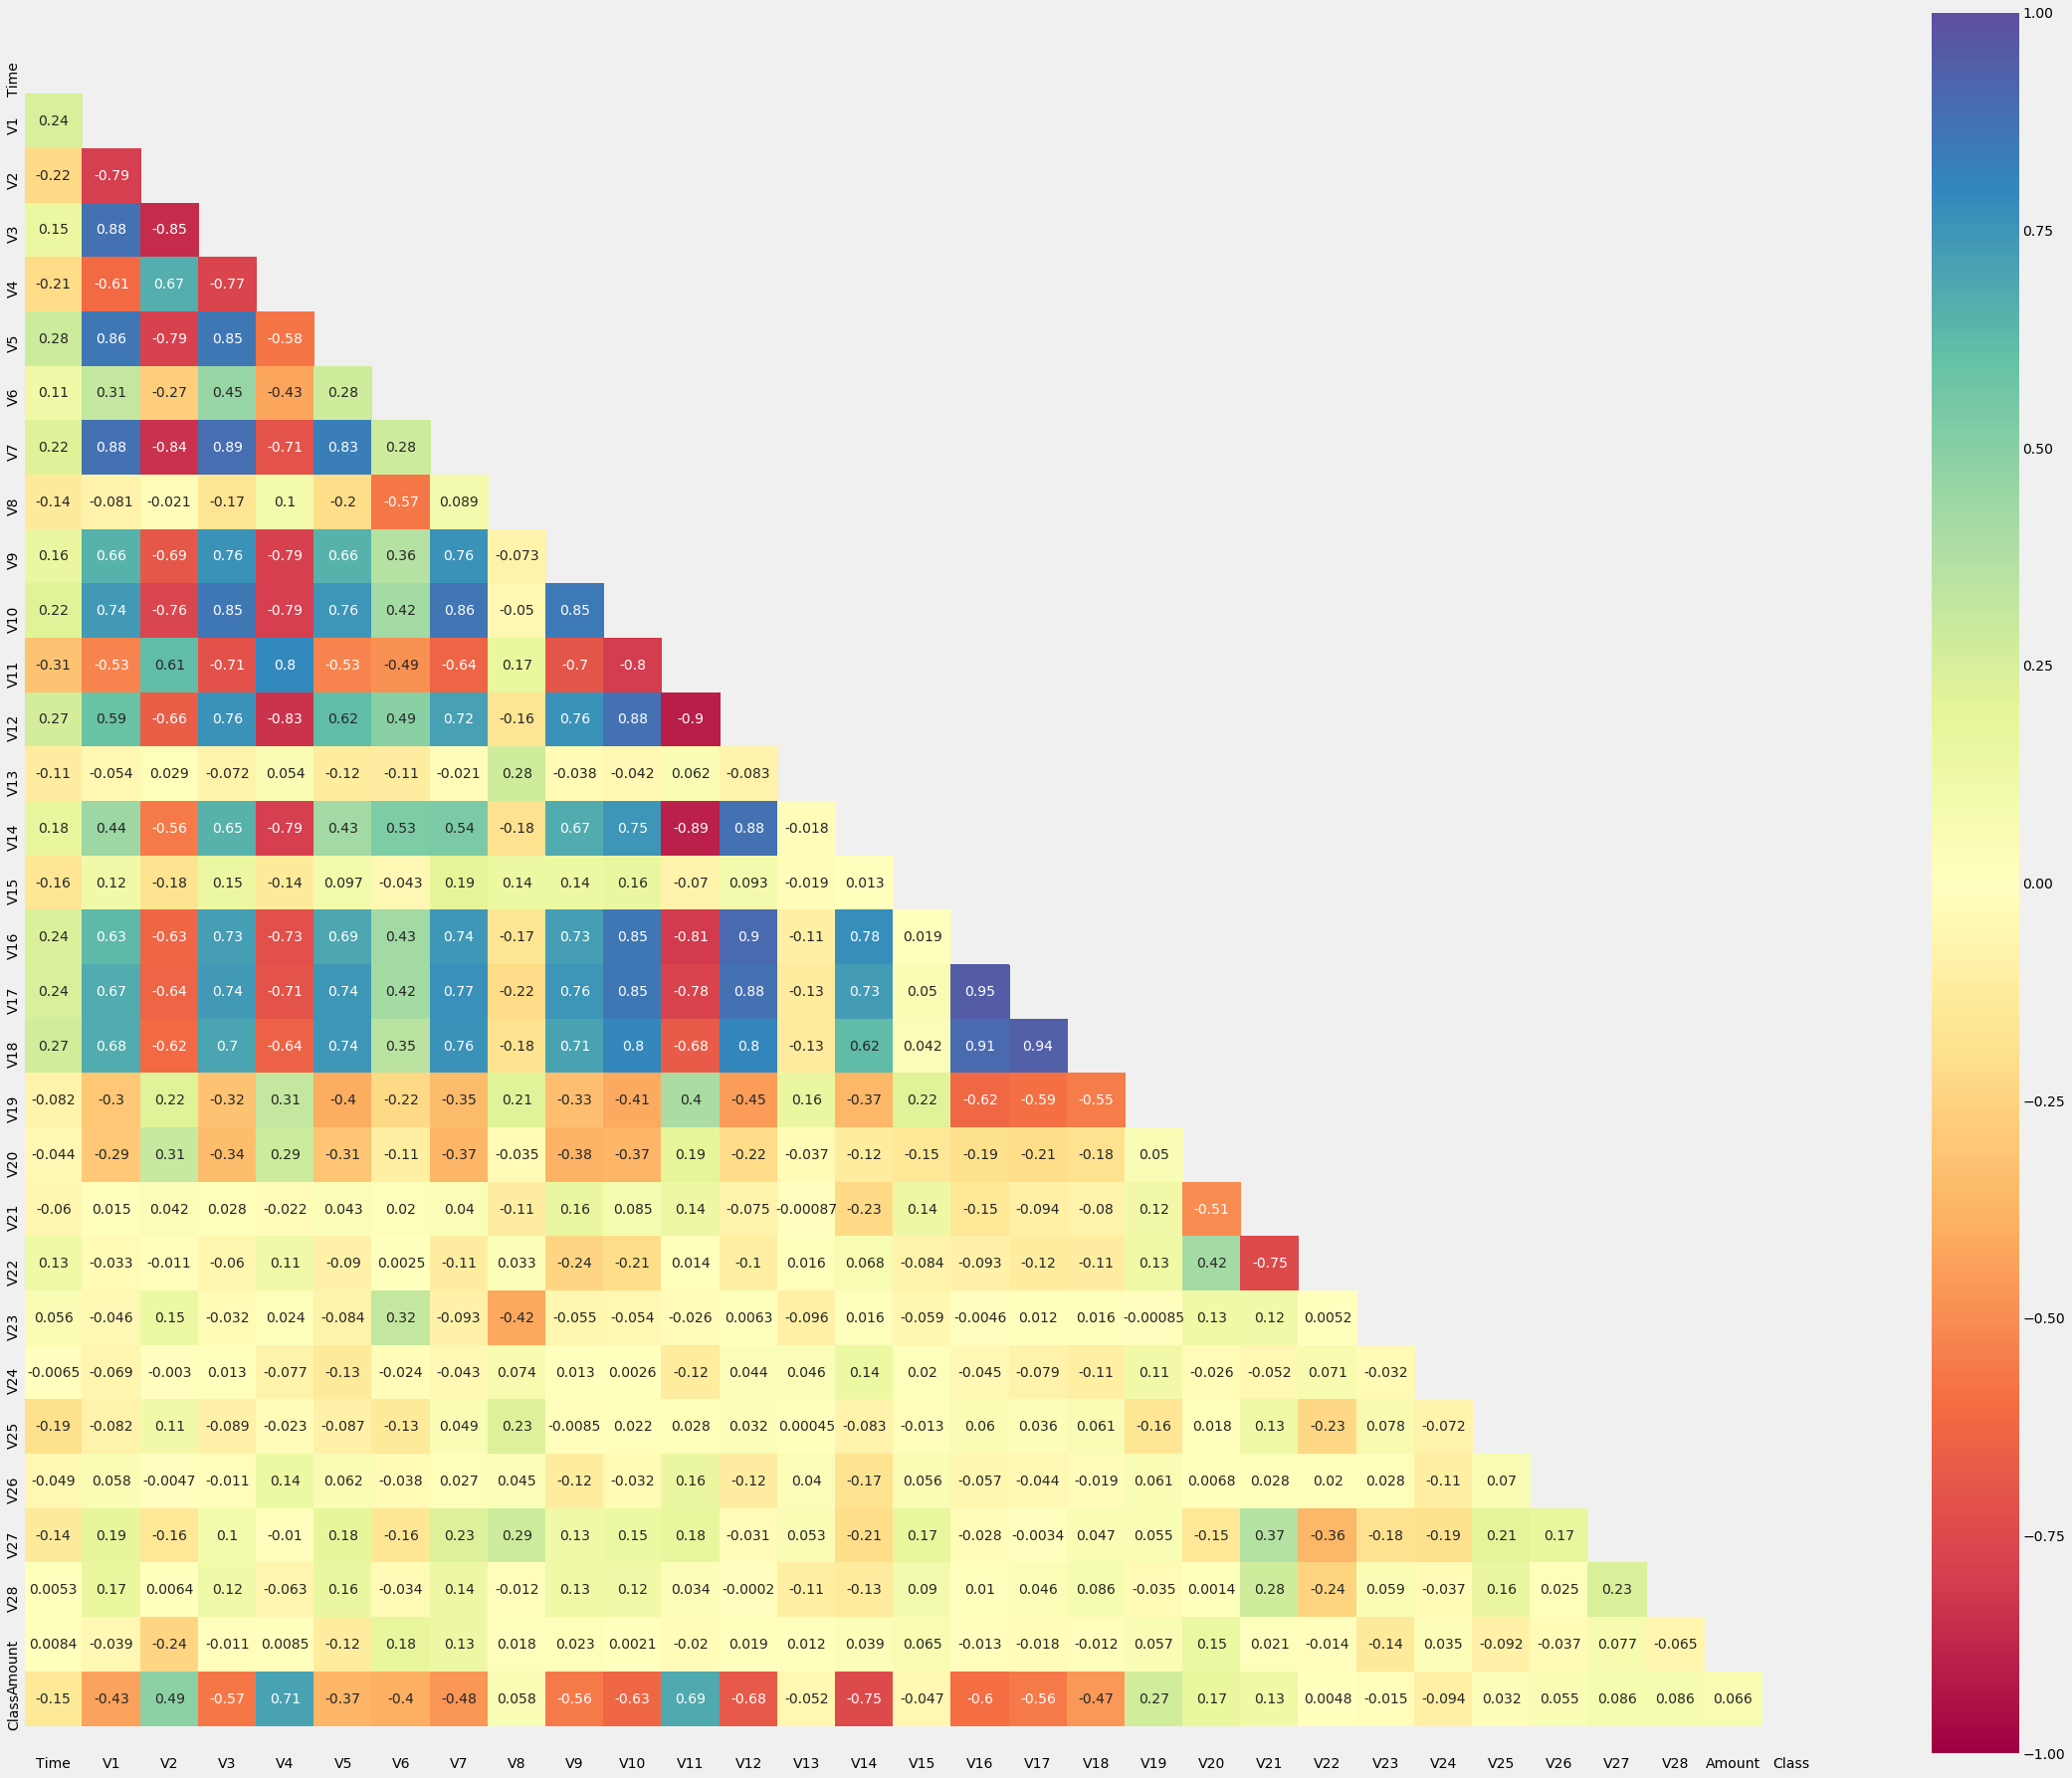

In [20]:
# Raw Data Correlation
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(36,30))
sns.heatmap(df2.corr(), mask=mask, annot=True, vmin=-1, vmax=1, cmap='Spectral')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('images/heatmapall2.png')

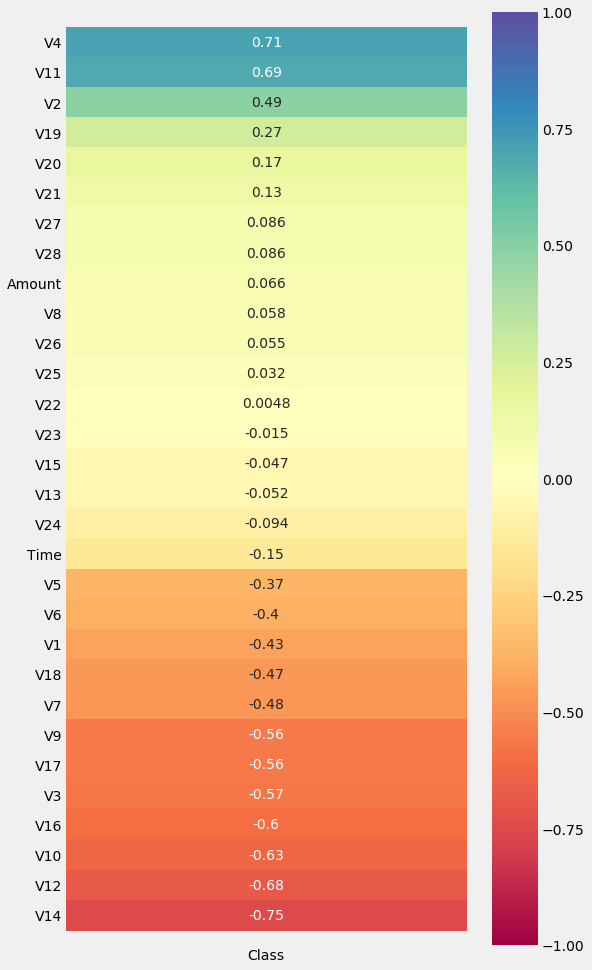

In [21]:
# Correlation against 'Class'
plt.figure(figsize=(8,16))
sns.heatmap(df2.corr()[['Class']].drop(index=['Class']).sort_values(by='Class', ascending=False), annot=True, vmin=-1, vmax=1, cmap='Spectral')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#Vmin and Vmax are making it so it diverges on 0, not how it was

plt.savefig('images/heatmapclass3.png')

In [23]:
variables_1 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']
variables_2 = ['V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

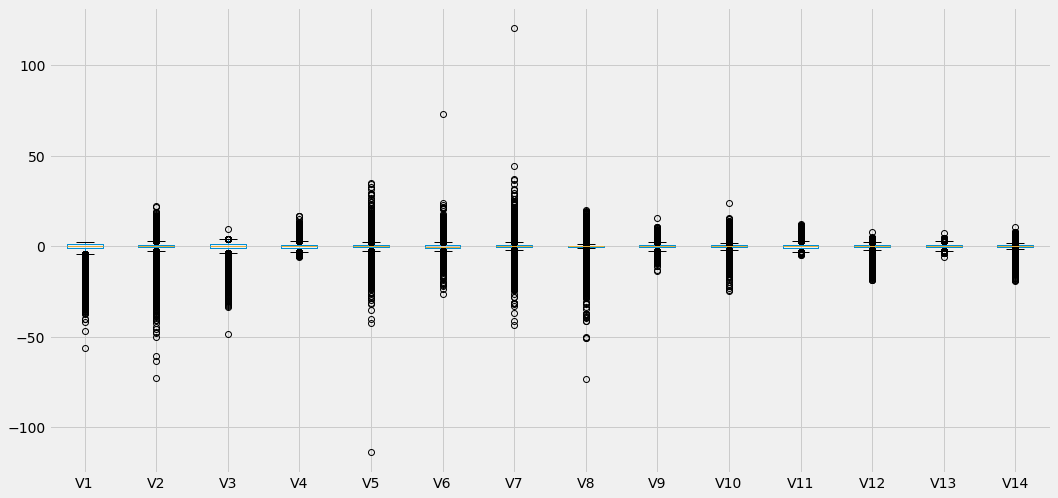

In [24]:
df_box1 = pd.DataFrame(data = df, columns = variables_1)
plt.figure(figsize=(16,8))
df_box1.boxplot();

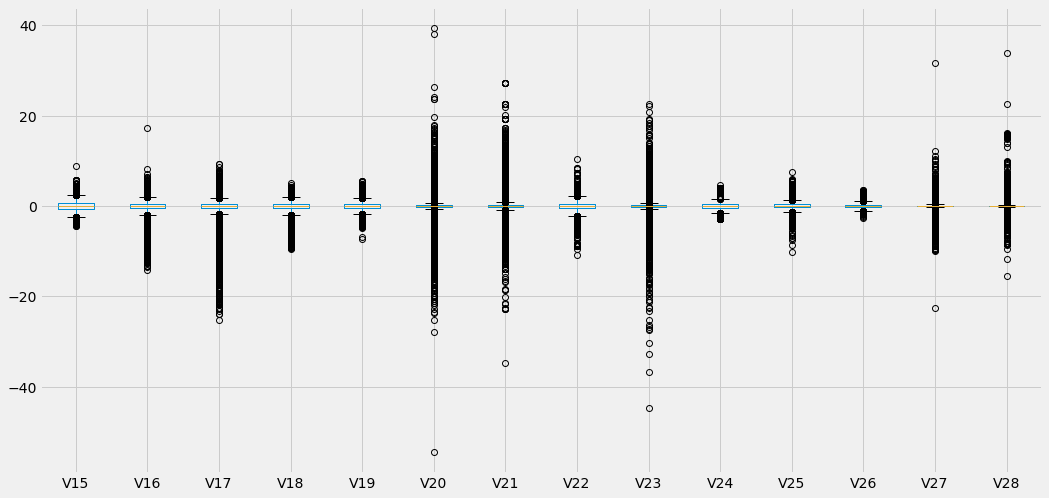

In [25]:
df_box2 = pd.DataFrame(data = df, columns = variables_2)
plt.figure(figsize=(16,8))
df_box2.boxplot();